<a href="https://colab.research.google.com/github/sfansaria/Breast-Cancer-Diagnosis-KNNClassifier/blob/main/Breast_Cancer_Diagnosis_KNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


In [118]:
#Load the dataset

df = pd.read_csv('/content/drive/My Drive/ml_datasets/breast-cancer.csv')
print(df.head(5))
print(df.shape)
print(df.info())
print(df.columns)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [119]:
df.drop(['id'], axis=1)
print(df.shape)

(569, 32)


In [120]:
corr=df.corr()
corr


<ipython-input-120-7d5195e2bf4d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [121]:
#Convert the diagnosis value of M and B to a numerical value where
#M--Malignant=0
#B--Benign = 1
def diagnosis_value(diagnosis):
  if diagnosis == 'M':
    return 1
  else:
    return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

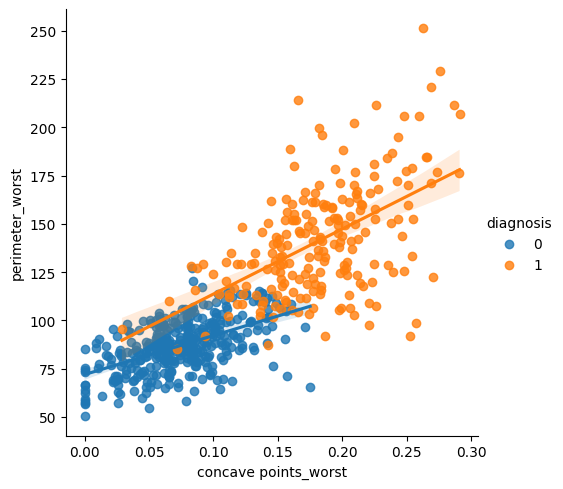

In [122]:
sns.lmplot(x='concave points_worst', y = 'perimeter_worst',hue='diagnosis',data=df)

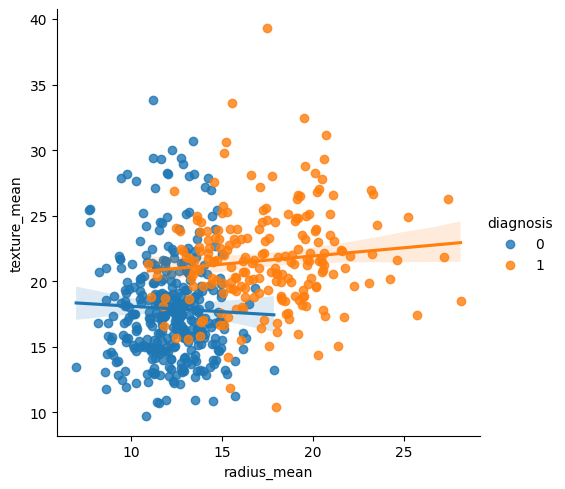

In [123]:
sns.lmplot(x='radius_mean', y = 'texture_mean',hue='diagnosis',data=df)

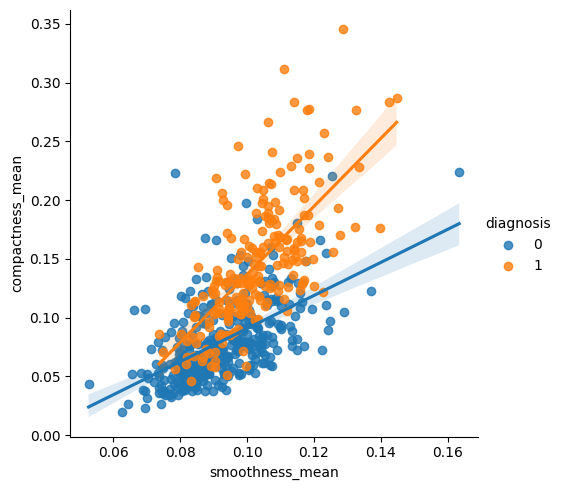

In [124]:
sns.lmplot(x='smoothness_mean', y='compactness_mean', data=df,hue='diagnosis')

In [125]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

In [126]:
#Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [127]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [128]:
#Prediction Score
knn.score(X_test, y_test)

0.9649122807017544

In [129]:
#Performing Cross Validation

neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score

for k in range(1, 51,2):
  neighbors.append(k)
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
  cv_scores.append(scores.mean())



In [130]:
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]
print('THe optimal number of neighbors is %d' %optimal_k)

THe optimal number of neighbors is 11


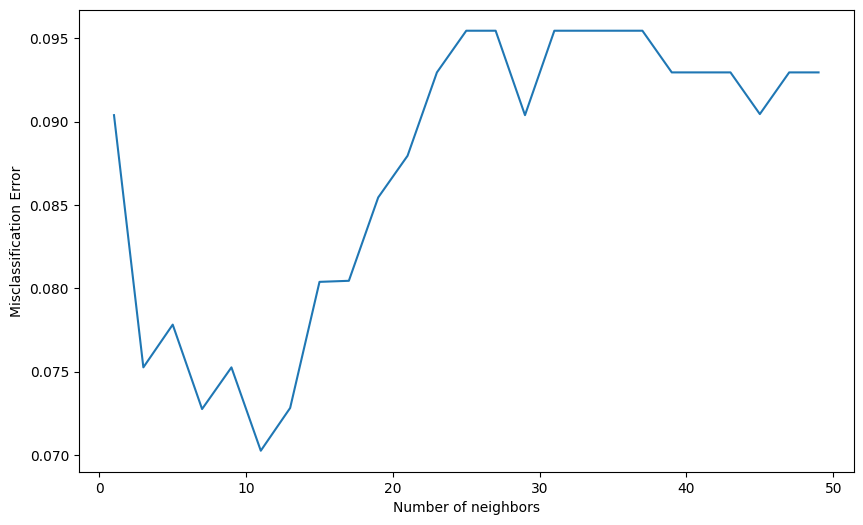

In [131]:
#PLot misclassification error versus k
plt.figure(figsize=(10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [132]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
#Prediction Score
knn.score(X_test, y_test)

0.9649122807017544